In [4]:
import pandas as pd

fromUrl = False


if (fromUrl==False):
    #Reading the dataset from an online repository:
    #-----------------------------------------------
    fileUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
    #define the list of column headings for the dataset. This list is based on the documentation
    #for the dataset available at: 
    #https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
    columnHeadings=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','annualincome']
    # we can directly use read_csv to download the file
    censusData = pd.read_csv(fileUrl,header=None,names=columnHeadings,index_col=False,na_values=['?'],nrows=32560)
    # save the file locally 
    censusData.to_csv('./data/censusDataRaw.csv',index=False)
else:
    #Reading the dataset from a local file
    #---------------------------------------------
    censusData = pd.read_csv("./data/censusDataRaw.csv",index_col=False,na_values=['?'],nrows=32560)

# lets have a look at the top of the dataset
censusData.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annualincome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#This code illustrates how the DictVectorizer class works.

from sklearn.feature_extraction import DictVectorizer
#create the vectorizor object
v = DictVectorizer(sparse=False)
#create some sample data listing the different values in the domain of 3 features 'foo', 'bar, 'baz'
D = [{'foo': 'f1v1', 'bar': 'f2v1'}, {'foo': 'f1v2', 'baz': 'f3v1'}, {'foo': 'f1v3', 'bar': 'f2v2'}, {'foo': 'f1v2', 'baz': 'f3v2'}]
#pass in the data into the vectorizer object so that it can learn an encoding for the feature values, this function 
#also returns the data after the encoding as been applied (but we will ignore this for now)
X=v.fit_transform(D)
#Now we will output the mapping from feature values to binary features:
print("Mapping from feature values to binary features:")
enc_dict = v.vocabulary_
for k in sorted(enc_dict.keys()):
    mapping = k + " : column " + str(enc_dict[k]) + " = 1"
    print(mapping)
    
#The following examples show how we can use the vectorizer object to encode other vectors using the same encoding:
print("Encode other feature vectors using the above one-hot encoding:")
data_2_vectorize = {'foo': 'f1v1', 'bar': 'f2v1', 'baz': 'f3v1'}
vectorized_data = v.transform(data_2_vectorize)
print(vectorized_data[0])
data_2_vectorize2 = {'foo': 'f1v2', 'bar': 'f2v2', 'baz': 'f3v2'}
vectorized_data = v.transform(data_2_vectorize2)
print(vectorized_data[0])
data_2_vectorize3 = {'foo': 'f1v1', 'bar': 'f2v2', 'baz': 'f3v1'}
vectorized_data = v.transform(data_2_vectorize3)
print(vectorized_data[0])

Mapping from feature values to binary features:
bar=f2v1 : column 0 = 1
bar=f2v2 : column 1 = 1
baz=f3v1 : column 2 = 1
baz=f3v2 : column 3 = 1
foo=f1v1 : column 4 = 1
foo=f1v2 : column 5 = 1
foo=f1v3 : column 6 = 1
Encode other feature vectors using the above one-hot encoding:
[1. 0. 1. 0. 1. 0. 0.]
[0. 1. 0. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 0. 0.]


In [6]:
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
import numpy as np

####################################
# Extract Target Feature
###################################
# **sci-kit** expects that the descriptive features and target features 
# are passed to the model training functions as separate parameters. 
# so the first step in data preprocessins is to extract the 
# target feature values into a separate variable
targetLabels = censusData['annualincome']
print("Sample target labels!:")
print(targetLabels[0])
print(targetLabels[1])
print(targetLabels[4])

####################################
# Extract Numeric Descriptive Features
###################################
# We want to do some preprocessing on the categorical data so 
# We first extract the numeric_features into a separate data structure
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
numeric_dfs = censusData[numeric_features]
print("-------------------------")
print("Sample numeric features!:")
numeric_dfs.head()

####################################
# Extract Categorical Descriptive Features
###################################
cat_dfs = censusData.drop(numeric_features + ['annualincome'],axis=1)
print("-------------------------")
print("Raw Cat features:")
print(cat_dfs.head())

####################################
# Remove missing values and apply one-hot encoding
###################################
#handle missing values
#If the data has missing values, they will become NaNs in the Numpy arrays generated by the vectorizor so lets get rid of them
cat_dfs.replace('?','NA')
cat_dfs.fillna( 'NA', inplace = True )

#transpose into array of dictionaries (one dict per instance) of feature:level pairs
cat_dfs = cat_dfs.T.to_dict().values()
#convert to numeric encoding
vectorizer = DictVectorizer( sparse = False )
vec_cat_dfs = vectorizer.fit_transform(cat_dfs) 
print("-------------------------")
print("Output the numeric encoding mapping:")
encoding_dictionary = vectorizer.vocabulary_
for k in sorted(encoding_dictionary.keys()):
    mapping = k + " : column " + str(encoding_dictionary[k]) + " = 1"
    print(mapping)

print("-------------------------")
print("Processed Cat features for first 5 instances:")
print(vec_cat_dfs[0])
print(vec_cat_dfs[1])
print(vec_cat_dfs[2])
print(vec_cat_dfs[3])
print(vec_cat_dfs[4])


########################################################
# Merge Categorical and Numeric Descriptive Features
########################################################
train_dfs = np.hstack((numeric_dfs.as_matrix(), vec_cat_dfs ))

Sample target labels!:
 <=50K
 <=50K
 <=50K
-------------------------
Sample numeric features!:
-------------------------
Raw Cat features:
           workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba  
-------------------------
Output the numeric encoding mapping:
education= 10th 

c:\users\1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [10]:
from sklearn import tree
from sklearn.model_selection import train_test_split

#---------------------------------------------------------------
#   Create and train a decision tree model using sklearn api
#---------------------------------------------------------------
print("Creating the decision tree model")
#create an instance of a decision tree model.
#documentation on the DecisionTreeClassifier constructor is available from: 
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#In this instance we set the model parameters to use entropy based information gain, 
decTreeModel = tree.DecisionTreeClassifier(criterion='entropy')
#fit the model using the numeric representations of the training data
decTreeModel.fit(train_dfs, targetLabels)

#---------------------------------------------------------------
#   Define Queries, Make Predictions, Map Predictions to Levels
#---------------------------------------------------------------
print("Defining queries, making predictions and mapping predictions to levels")
#To illustrate how to use the model to make predictions we will use the first 2 rows of the training dataset as queries.
#NOTE: Using the data you used to train a model as queries to test a model is a very bad idea!!!!! 
#The only reason we do this hear is to illustrate how we would prepare the queries in order to input them into the model
#and how to convert the the predictions returned by the model bask to the original levels in the dataset.

#Notice that when we convert a query to a numeric representation we pass in the same mapping that was used to
#transform the descriptive features in the training datset.
#we start by defining the query as as dictionary (note, we store the value as list to help with the conversion to a dataframe object later)
q = {'age':[39,50],'workclass':['State-gov','Self-emp-not-inc'],'fnlwgt':[77516,83311],'education':['Bachelors','Bachelors'],'education-num':[13,13],'marital-status':['Never-married','Married-civ-spouse'],'occupation':['Adm-clerical','Exec-managerial'],'relationhip':['Not-in-family','Husband'],'race':['White','White'],'sex':['Male','Male'],'capital-gain':[2174,0],'capital-loss':[0,0],'hours-per-week':[40,13],'native_country':['United-States','United-States']}
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationhip','race','sex','capital-gain','capital-loss','hours-per-week','native_country']
qdf = pd.DataFrame.from_dict(q,orient="columns")
print("\n")
print("Raw Queries!")
print("------------------------------")
print(qdf)

q_num = qdf[numeric_features].as_matrix() #extract the numeric features

#convert the categorical features
q_cat = qdf.drop(numeric_features,axis=1)
q_cat_dfs = q_cat.T.to_dict().values()
q_vec_dfs = vectorizer.transform(q_cat_dfs) 

query = np.hstack((q_num, q_vec_dfs ))
print("\n")
print("Preprocessed Queries")
print("------------------------------")
print(query[0])
print(query[1])

#Use the model to make predictions for the 2 queries
predictions = decTreeModel.predict([query[0],query[1]])

print("\n")
print("Predictions!")
print("------------------------------")
print(predictions)
#The predictions returned by the model are numeric so map them back to the levels in the dataset and output the predictions.
#Because we use the first 3 rows of the training data as the queries we would expect that the models predictions should
#match the first 3 entries in the annualIncome column (if everything is working correctly!
#predictedLevels = convertMapping2Level(predictions,targetMappings)
#print("Predicted Levels are: " + str(predictedLevels))

Creating the decision tree model
Defining queries, making predictions and mapping predictions to levels


Raw Queries!
------------------------------
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   

       marital-status       occupation    relationhip   race   sex  \
0       Never-married     Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse  Exec-managerial        Husband  White  Male   

   capital-gain  capital-loss  hours-per-week native_country  
0          2174             0              40  United-States  
1             0             0              13  United-States  


Preprocessed Queries
------------------------------
[3.9000e+01 7.7516e+04 1.3000e+01 2.1740e+03 0.0000e+00 4.0000e+01
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e

c:\users\1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


-------------------------------------------------
Accuracy and Confusion Matrix on Hold-out Testset
-------------------------------------------------
Accuracy= 0.819794226044226
[[8688 1217]
 [1130 1989]]





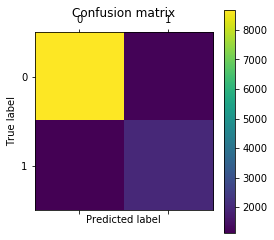

------------------------
Cross-validation Results
------------------------
Entropy based Model:
Score by fold: [0.81371546 0.81832139 0.81064483 0.81166837 0.80296827 0.81218014
 0.79825909 0.79825909 0.82437276 0.81259601]
Accuracy: 0.8103 (+/- 0.02)



Gini based Model:
Score by fold: [0.8198567  0.82036847 0.80655067 0.80143296 0.80194473 0.81064483
 0.80645161 0.79877112 0.81976446 0.81310804]
Accuracy: 0.8099 (+/- 0.02)


In [14]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#--------------------------------------------
# Hold-out Test Set + Confusion Matrix
#--------------------------------------------
print("-------------------------------------------------")
print("Accuracy and Confusion Matrix on Hold-out Testset")
print("-------------------------------------------------")
#define a decision tree model using entropy based information gain
decTreeModel2 = tree.DecisionTreeClassifier(criterion='entropy')
#Split the data: 60% training : 40% test set
instances_train, instances_test, target_train, target_test = model_selection.train_test_split(train_dfs, targetLabels, test_size=0.4, random_state=0)
#fit the model using just the test set
decTreeModel2.fit(instances_train, target_train)
#Use the model to make predictions for the test set queries
predictions = decTreeModel2.predict(instances_test)
#Output the accuracy score of the model on the test set
print("Accuracy= " + str(accuracy_score(target_test, predictions, normalize=True)))
#Output the confusion matrix on the test set
confusionMatrix = confusion_matrix(target_test, predictions)
print(confusionMatrix)
print("\n\n")

#Draw the confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
# Show confusion matrix in a separate window
plt.matshow(confusionMatrix)
#plt.plot(confusionMatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#--------------------------------------------
# Cross-validation to Compare to Models
#--------------------------------------------
print("------------------------")
print("Cross-validation Results")
print("------------------------")

#run a 10 fold cross validation on this model using the full census data
scores=model_selection.cross_val_score(decTreeModel2, instances_train, target_train, cv=10)
#the cross validaton function returns an accuracy score for each fold
print("Entropy based Model:")
print("Score by fold: " + str(scores))
#we can output the mean accuracy score and standard deviation as follows:
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("\n\n")

#for a comparison we will do the same experiment using a decision tree that uses the Gini impurity metric
decTreeModel3 = tree.DecisionTreeClassifier(criterion='gini')
scores=model_selection.cross_val_score(decTreeModel3, instances_train, target_train, cv=10)
print("Gini based Model:")
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))